This project is for the class of OPS802. The target of the project is to have a hands on full data analytics experience from A to Z. That means starting with raw data and reading it into python then doing some analytical and statstical observations on the data and finally doing some supervised and unsupervised learning on the data. The data we will use for this project is one of the most famous datasets in the machine learning world which is called IRIS classification dataset. That means there is plenty of resources for you online to learn from and that you are not the first person who saw and analyzed this data. Use this to your advantage. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. We will describe it more in details later. The project measures the capabilities of lodaing data, cleaning it up, running some tests and statistical analysis and finally machine learning. The following highlights the project
-  The project consists of four parts, they are mostly independent and in order based on what we studies in class
-  The deadline of the project is the last day of the quarter
-  The project is individual, however I encourage you to talk to each other to check your different approaches without copying codes or talking about detailed code specific. For example, it is ok to ask about which function you have used to tackle part a and is it better than this other function or not. It is not ok to copy the exact code including that function you asked about.
- You are expected to heavily utilize resources outside the class notebooks such as Google, StackOverflow, .. etc
- Code cleanings and Display has 10% of the grade

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [264]:
# Solve Here
df = pd.read_csv('iris_not_clean.data', header=None, skiprows=[1,0], names=['sepal_length','sepal_width','petal_length','petal_width','species'], sep='|')
df

#How many rows and columns
df.shape #153 rows and 5 columns

#how many nulls in the file
df.isnull().sum(axis=0) #13 nulls in the file

#Which rows contains nans and how many nans in each of these rows
is_nan = df.isnull()
row_has_nan = is_nan.any(axis=1)
row_with_nan = df[row_has_nan]
print(row_with_nan) #Sepal length, petal length, petal width and class contains nan values
#sepal length = 2
#sepal width = 2
#petal length = 3
#petal width = 3
#class = 3

#The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
for row in df:
    if df.loc[36, 'sepal_length'] == 5.0:
        df.loc[36,'sepal_length'] = 4.9
    elif df.loc[36, 'sepal_width'] == 3.2:
        df.loc[36, 'sepal_width'] = 3.1
    elif df.loc[36, 'petal_length'] == 1.2:
        df.loc[36, 'petal_length'] = 1.5
df.loc[36, 'sepal_length'] = 4.9
df.loc[36]

#The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa", where the errors are in the second and third features. Fix it
for row in df:
    if df.loc[39,'sepal_length'] == 4.4:
        df.loc[39,'sepal_length'] = 4.9
    elif df.loc[39, 'sepal_width'] == 3:
        df.loc[39, 'sepal_width'] = 3.6
    elif df.loc[39, 'petal_length'] == 1.3:
        df.loc[39, 'petal_length'] = 1.4
    elif df.loc[39, 'petal_width'] == 0.2:
        df.loc[39, 'petal_width'] = 0.1
df.loc[39, 'sepal_length'] = 4.9
df.loc[39]

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
148,6.7,3.0,5.2,2.3,Iris-virginica
149,6.3,2.5,5.0,1.9,Iris-virginica
150,6.5,3.0,5.2,2.0,Iris-virginica
151,6.2,3.4,5.4,2.3,Iris-virginica


(153, 5)

sepal_length    2
sepal_width     2
petal_length    3
petal_width     3
species         3
dtype: int64

         sepal_length  sepal_width  petal_length  petal_width      species
27                5.2          3.4           NaN          0.2  Iris-setosa
28                NaN          NaN           NaN          NaN          NaN
32  #is this correct?          NaN           NaN          NaN          NaN
44                NaN          3.2           2.1          NaN          NaN


sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.2
species         Iris-setosa
Name: 36, dtype: object

sepal_length            4.9
sepal_width             3.6
petal_length            1.4
petal_width             0.1
species         Iris-setosa
Name: 39, dtype: object

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

sepal_length     object
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

sepal_length    5.841333
sepal_width     3.057616
petal_length    3.765333
petal_width     1.198000
dtype: float64

sepal_length    0.689153
sepal_width     0.188192
petal_length    3.084562
petal_width     0.583821
dtype: float64

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,151.000000,150.000000,150.000000
mean,5.841333,3.057616,3.765333,1.198000
std,0.830152,0.433811,1.756292,0.764082
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal_length    5.845638
sepal_width     3.054362
petal_length    3.776510
petal_width     1.204698
dtype: float64

sepal_length    0.691011
sepal_width     0.189795
petal_length    3.086539
petal_width     0.580991
dtype: float64

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117723,0.873034,0.818637
sepal_width,-0.117723,1.000000,-0.424357,-0.359908
petal_length,0.873034,-0.424357,1.000000,0.962340
petal_width,0.818637,-0.359908,0.962340,1.000000


Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: species, dtype: int64

,sepal_length,sepal_width,petal_length,petal_width,species
94,6.1,3.0,4.6,1.4,Iris-versicolor
67,5.6,2.9,3.6,1.3,Iris-versicolor
104,5.8,2.7,5.1,1.9,Iris-virginica
6,5.0,3.4,1.5,0.2,Iris-setosa
63,5.0,2.0,3.5,1.0,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
102,5.7,2.8,4.1,1.3,Iris-versicolor
125,7.7,2.8,6.7,2.0,Iris-virginica


<Figure size 1080x1080 with 0 Axes>

(array([ 9., 24., 12., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'sepal_length')

Text(0.5, 0, 'length/width')

Text(0, 0.5, 'frequency')

(array([ 4.,  7., 22., 24., 38., 30.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'sepal_width')

Text(0.5, 0, 'length/width')

Text(0, 0.5, 'frequency')

(array([36., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'petal_length')

Text(0.5, 0, 'length/width')

Text(0, 0.5, 'frequency')

(array([40.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'petal_width')

Text(0.5, 0, 'length/width')

Text(0, 0.5, 'frequency')

(array([49.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'species')

Text(0.5, 0, 'length/width')

Text(0, 0.5, 'frequency')

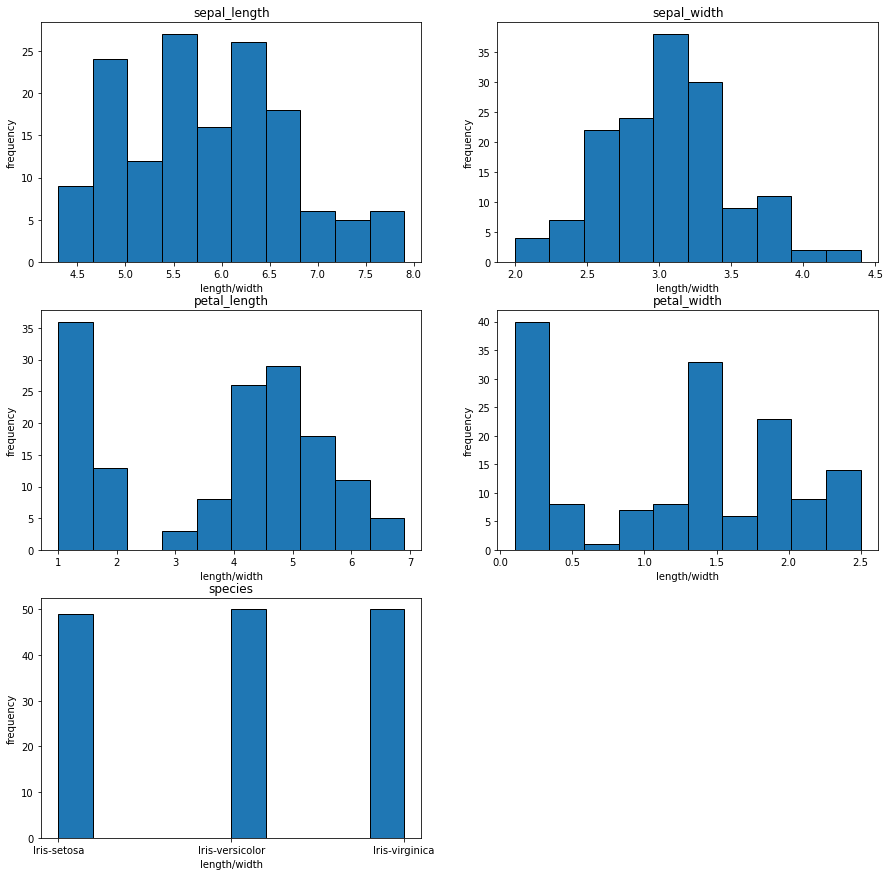

In [265]:
# Solve Here
#column sepal_length was an object so it wouldnt include the variance or mean of the output so therefore I had to change the datatype from an object to a float
df.dtypes
df['sepal_length'] = pd.to_numeric(df['sepal_length'], errors='coerce')

#What is the mean and variance for each column and use the function describe to get insights about the data
df.mean()
#sepal_length = 5.84
#sepal_width = 3.06
#petal_length = 3.77
#petal_width = 1.20

df.var()
#sepal_length = 0.69
#sepal_width = 0.19
#petal_length = 3.08
#petal_width = 0.58

df.describe()

#Drop the nan rows
df.drop(index=[27,28,32,44], inplace=True) #we know which rows have null values, therefore we can use df.drop for each index

#Recaluclate the mean and variance for each column
df.mean()
#sepal_length    5.845638
#sepal_width     3.054362
#petal_length    3.776510
#petal_width     1.204698

df.var()
#sepal_length    0.691011
#sepal_width     0.189795
#petal_length    3.086539
#petal_width     0.580991

#What is the correlation between the fourth column and each of the other three columns individually? Any observations
df.corr()
#between the fouth column and the first

#How many records exist for each class. # Hint, you can do this in one line by using groupby
df['species'].value_counts()

#Change the random seed to 1234 and randomly pick 20 samples of the data and display it
import random
np.random.seed(1234)
df.sample(20)

#Plot histogram for all the data attributes
plt.figure(figsize=(15,15))
colors = ['g','r','y','b','t']
count = 1
for column in df.columns:
    plt.subplot(3,2,count)
    plt.hist(df[column], edgecolor='black')
    count=count+1
    plt.title(column)
    plt.xlabel('length/width')
    plt.ylabel('frequency')

Iris-setosa        51
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

(array([0.00635705, 0.01589262, 0.08899867, 0.20978258, 0.36235172,
        0.37506582, 0.2924242 , 0.17164029, 0.04767786, 0.01907114]),
 array([-3.42043133, -2.79120844, -2.16198554, -1.53276265, -0.90353976,
        -0.27431686,  0.35490603,  0.98412893,  1.61335182,  2.24257472,
         2.87179761]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Density')

Ttest_1sampResult(statistic=-0.6384471516484906, pvalue=0.5232118923683144)

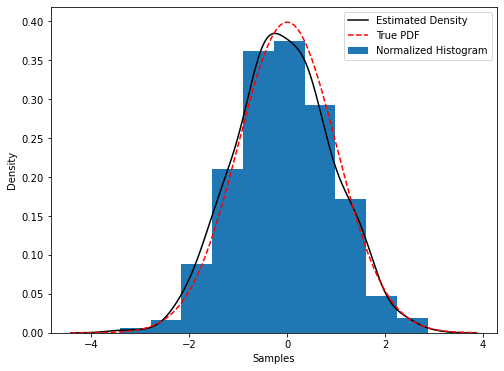

In [287]:
# Solve Here
import scipy.stats
np.random.seed(12456)
x1 = np.random.normal(size=500) #random data and normal distribution
xs = np.linspace(x1.min()-1, x1.max()+1, 500)

kde1 = scipy.stats.gaussian_kde(x1) #find out the best fit

fig = plt.figure(figsize=(8,6))

plt.hist(x1, density=True, label='Normalized Histogram') # rug plot
plt.plot(xs, kde1(xs), 'k-', label='Estimated Density') #test your fit
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label='True PDF')
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

#Calculate the mean of the new samples and compare how close it is to the mean of the given data
scipy.stats.ttest_1samp(kde1.resample(5000)[0],x1.mean())

#We can see that the mean of the new sample is 52% away from the mean of the given data

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

(150, 4)

<Figure size 576x576 with 0 Axes>

<BarContainer object of 150 artists>

Text(0.5, 1.0, 'reduced PCA dimensions')

<Figure size 576x576 with 0 Axes>

<BarContainer object of 150 artists>

Text(0.5, 1.0, 'PCA')

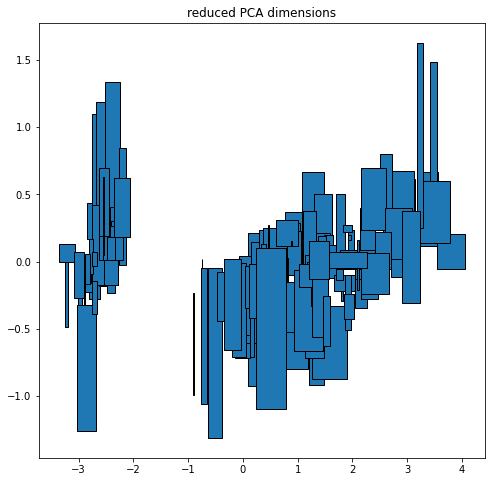

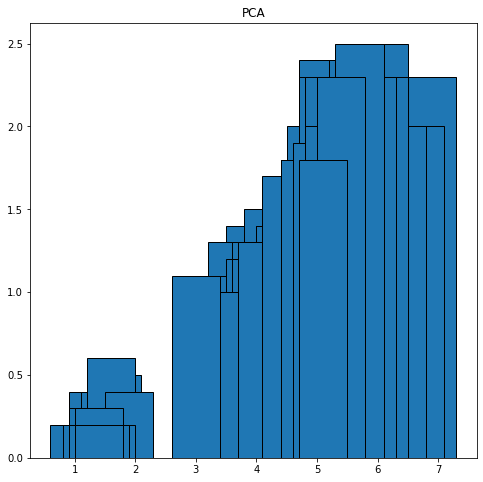

In [242]:
# Solve Here
from sklearn.decomposition import PCA
from sklearn import datasets
dataset_iris = datasets.load_iris() #We have to load and use iris dataset
print(dataset_iris['DESCR'])

#create a pca model and reduced pca
pca_model = PCA(n_components = 4)
reduced_pca = pca_model.fit_transform(dataset_iris.data)
pca_model.explained_variance_ratio_
reduced_pca.shape

#plot the new dimensions of the reduced pca
plt.figure(figsize=(8,8))
plt.bar(reduced_pca[:,0], reduced_pca[:,1], reduced_pca[:,2], reduced_pca[:,3], edgecolor='black')
plt.title('reduced PCA dimensions')

#use pca to reduce the number of attributes by 1.
#just leave out the first dimension or attribute
att_2 = dataset_iris.data[:,2]
att_3 = dataset_iris.data[:,3]
plt.figure(figsize=(8,8))
plt.bar(att_2,att_3,edgecolor='black')
plt.title('PCA')

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

KMeans(n_clusters=2)

[[ 1.38640101 -0.06980433 -0.005908    0.00296378]
 [-2.53737542  0.12775509  0.01081276 -0.00542428]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


KMeans(n_clusters=2)

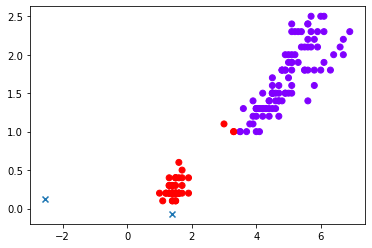

In [208]:
# Solve Here
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(reduced_pca)
#check the model
print(kmeans_model.cluster_centers_)
print(kmeans_model.labels_)
plt.scatter(att_2,att_3, c = kmeans_model.labels_, cmap = 'rainbow')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], cmap = 'rainbow', marker='x')
KMeans(n_clusters=2)

KMeans(n_clusters=3)

[[ 2.37446608e+00  2.63116935e-01  5.09385084e-02 -1.72893500e-02]
 [-2.64241546e+00  1.90885047e-01  1.35812812e-02 -5.44928771e-04]
 [ 6.75662290e-01 -3.15204772e-01 -4.21730223e-02  1.10361570e-02]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


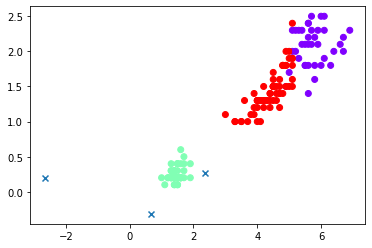

In [211]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(reduced_pca)
#check the model
print(kmeans_model.cluster_centers_)
print(kmeans_model.labels_)
plt.scatter(att_2,att_3, c = kmeans_model.labels_, cmap = 'rainbow')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], cmap = 'rainbow', marker='x')

KMeans(n_clusters=4)

[[-2.64241546e+00  1.90885047e-01  1.35812812e-02 -5.44928771e-04]
 [ 1.22298167e+00 -9.44664168e-02 -4.62007271e-02 -7.39451917e-03]
 [ 1.07311300e-01 -5.49526178e-01 -3.95552351e-02  3.86099693e-02]
 [ 2.50614969e+00  3.00660541e-01  7.11409876e-02 -2.36891229e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 3 1 3 3 3 3 2 3 3 3 1
 1 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 1 1
 3 1]


KMeans(n_clusters=2)

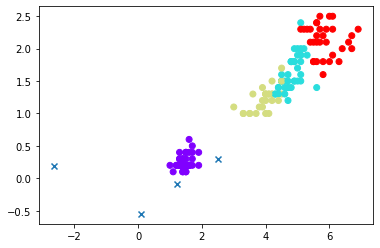

In [212]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(reduced_pca)
#check the model
print(kmeans_model.cluster_centers_)
print(kmeans_model.labels_)
plt.scatter(att_2,att_3, c = kmeans_model.labels_, cmap = 'rainbow')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], cmap = 'rainbow', marker='x')
KMeans(n_clusters=2)

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [284]:
# Solve Here
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(dataset_iris.data, dataset_iris.target, test_size=0.2)
print(x_train.shape)
print(y_train.shape)

#Build a Logistci regression model for the reduced IRIS dataset
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

predicted = log_reg.predict(x_test)
predicted
log_reg.coef_

#get the accuracy of the model
log_reg_score = log_reg.score(x_test,y_test)
print(log_reg_score)
#we have a 97% accuracy in the test data

#Form the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
confusion_matrix

(120, 4)
(120,)


LogisticRegression()

array([0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 0, 0, 2, 1])

array([[-0.39319666,  0.90280448, -2.3494523 , -0.98152892],
       [ 0.25020656, -0.35944714, -0.10294681, -0.88948811],
       [ 0.1429901 , -0.54335734,  2.4523991 ,  1.87101703]])

0.9666666666666667


array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  6]])